# Librería Xarray

Pandas es una librería muy útil para tratar datos tabulados, en dos dimensiones, pero no es tan conveniente para tres dimensiones o más. Sin embargo en meteorología es muy habitual tratar con datos multidimensionales, por ejemplo en campos meteorológicos que dependen de las tres coordenadas espaciales y del tiempo.

Xarray (https://docs.xarray.dev) es una librería construida sobre Numpy que permite tratar datos multidimensionales con etiquetas, y comparte muchas de las características de Pandas. Hace que los datos sean más legibles tratándolos de forma sencilla y eficiente.

Además está estrechamente relacionado con Cartopy, otra librería especializada en el dibujo de mapas.

## Lectura de datos. Estructuras Dataset y DataArray

Cargamos el módulo xarray:

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Deshabilitamos los avisos
import warnings
warnings.filterwarnings('ignore')

``open_dataset`` es una función de xarray que nos permite abrir ficheros netCDF (o URLs de un servidor remoto OpenDAP). El formato netCDF se utiliza comúnmente en meteorología para guardar información de los modelos meteorológicos (junto al formato grib), y xarray está especialmente adaptado para leerlo.

Para ilustrar xarray vamos a utilizar aquí varios ficheros del reanálisis ERA5 (https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5), descargados del Climate Data Store del C3S (Climate Change Service) del programa Copernicus. Se puede encontrar más información en https://climate.copernicus.eu/climate-reanalysis.

In [3]:
ds = xr.open_dataset('/MASIVO/pn31/curso_PIBM/era5_america_2022.nc')

``open_dataset`` abre un fichero netcDF y nos devuelve una de las dos estructuras básicas de datos de xarray, el Dataset. El Dataset es una especie de diccionario de DataArrays (otra estructura que veremos después):

Si se quiere abrir varios ficheros netCDF simultáneamente y cargarlos en un único dataset (por ejemplo, si tenemos 24 ficheros netCDF, uno por hora de predicción) podemos usar la función ``open_mfdataset``. Para liberar los recursos usaremos ``close``.

**Nota:** Por otra parte, si se quieren abrir ficheros con formato grib con xarray es necesario instalar previamente la librería cfgrib y dar al argumento *engine* de ``open_dataset`` el valor 'cfgrib' para que abra el fichero correctamente.

Veamos que contiene esta estructura de datos:

In [5]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 373, time: 568)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
  * time       (time) datetime64[ns] 2022-01-05 ... 2022-12-30T21:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-02 16:18:24 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Dentro de un dataset tenemos distintos atributos que nos informan sobre su contenido: variables, coordenadas, y dimensiones (los ejes de nuestros datos):

In [6]:
ds.data_vars

Data variables:
    t2m      (time, latitude, longitude) float32 ...
    sst      (time, latitude, longitude) float32 ...

In [7]:
ds.coords

Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
  * time       (time) datetime64[ns] 2022-01-05 ... 2022-12-30T21:00:00

In [8]:
ds.dims

Frozen({'longitude': 361, 'latitude': 373, 'time': 568})

Vemos que este fichero contiene información sobre dos variables, la temperatura a 2 metros (t2m) y la temperatura superficial del agua del mar (sst), para la región comprendida entre las longitudes -120 y 30 W, y entre las latitudes 33 N y 60 S (Centroamérica y Sudamérica, aproximadamente), para el año 2022.

Las variables del dataset son datos de tipo DataArray y se puede acceder ellos de la misma forma que se accede a las columnas en Pandas:

In [ ]:
ds['t2m']

o, de forma equivalente:

In [9]:
ds.t2m

<xarray.DataArray 't2m' (time: 568, latitude: 373, longitude: 361)>
[76482904 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
  * time       (time) datetime64[ns] 2022-01-05 ... 2022-12-30T21:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

En este caso tenemos dos dimensiones espaciales (latitud y longitud), y la temporal

In [12]:
ds.t2m.dims

('time', 'latitude', 'longitude')

Este es el tamaño del datarray en cada dimensión:

In [13]:
ds.t2m.shape

(568, 373, 361)

Podemos acceder también a cada variable coordenada:

In [6]:
ds.t2m.latitude

<xarray.DataArray 'latitude' (latitude: 373)>
array([ 33.  ,  32.75,  32.5 , ..., -59.5 , -59.75, -60.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
Attributes:
    units:      degrees_north
    long_name:  latitude

Dentro de un datarray tenemos metadatos y datos. Además de los metadatos anteriores podemos guardar otros metadatos adicionales en attrs:

In [10]:
ds.t2m.attrs

{'units': 'K', 'long_name': '2 metre temperature'}

Los datos están contenidos en data, que es un array de Numpy:

In [11]:
ds.t2m.data

array([[[286.97794, 287.05383, 287.10287, ..., 292.75677, 292.79648,
         292.82333],
        [287.1227 , 287.12857, 287.1227 , ..., 292.74976, 292.7848 ,
         292.814  ],
        [287.1846 , 287.1846 , 287.21265, ..., 292.71942, 292.75327,
         292.78247],
        ...,
        [275.75888, 275.73203, 275.65494, ..., 272.94827, 272.91092,
         272.84552],
        [275.74136, 275.77054, 275.79974, ..., 272.77896, 272.74744,
         272.72992],
        [275.62576, 275.6456 , 275.66547, ..., 272.68906, 272.67505,
         272.6692 ]],

       [[287.1986 , 287.2278 , 287.36444, ..., 292.67505, 292.69022,
         292.70773],
        [287.2465 , 287.3539 , 287.38196, ..., 292.6692 , 292.67035,
         292.67853],
        [287.26517, 287.35626, 287.36792, ..., 292.68204, 292.68204,
         292.69604],
        ...,
        [275.61176, 275.6596 , 275.71567, ..., 273.01248, 273.01248,
         272.97513],
        [275.51834, 275.55338, 275.58838, ..., 272.8759 , 272.88406,
   

## Selección e indexado

Vamos a guardar el datarray anterior en grados Celsius:

In [4]:
t2m = ds['t2m'] - 273.15

Se puede seleccionar un subconjunto de este darray de varias formas. La primera es utilizando la posición en el array, como haríamos con Numpy:

In [9]:
t2m[1, 10:13, 20:25]

<xarray.DataArray 't2m' (latitude: 3, longitude: 5)>
array([[10.477875, 13.117981, 16.6362  , 16.644379, 16.645538],
       [ 9.706024, 11.723785, 15.378601, 16.667725, 16.421356],
       [ 9.812286, 11.28241 , 14.028778, 15.884216, 16.778656]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -115.0 -114.8 -114.5 -114.2 -114.0
  * latitude   (latitude) float32 30.5 30.25 30.0
    time       datetime64[ns] 2022-01-05T03:00:00

Xarray dispone de dos operadores muy fáciles de usar que permiten hacer selecciones:
- *isel* : selecciona por posición
- *sel* : selecciona por valores o etiquetas

In [10]:
# Selecciona los datos que corresponden al segundo valor del tiempo (para el primero sería time=0)
t2m.isel(time=1)   

<xarray.DataArray 't2m' (latitude: 373, longitude: 361)>
array([[14.0486145 , 14.07782   , 14.214447  , ..., 19.525055  ,
        19.540222  , 19.55774   ],
       [14.096497  , 14.203918  , 14.231964  , ..., 19.519196  ,
        19.520355  , 19.528534  ],
       [14.115173  , 14.206268  , 14.217926  , ..., 19.532043  ,
        19.532043  , 19.546051  ],
       ...,
       [ 2.4617615 ,  2.509613  ,  2.5656738 , ..., -0.1375122 ,
        -0.1375122 , -0.17486572],
       [ 2.3683472 ,  2.4033813 ,  2.438385  , ..., -0.2741089 ,
        -0.26593018, -0.2484436 ],
       [ 2.315796  ,  2.3391418 ,  2.3624878 , ..., -0.32315063,
        -0.31497192, -0.29748535]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
    time       datetime64[ns] 2022-01-05T03:00:00

In [11]:
# Lo mismo que antes, pero seleccionando por valor
t2m.sel(time='2022-01-05T03:00:00')   

<xarray.DataArray 't2m' (latitude: 373, longitude: 361)>
array([[14.0486145 , 14.07782   , 14.214447  , ..., 19.525055  ,
        19.540222  , 19.55774   ],
       [14.096497  , 14.203918  , 14.231964  , ..., 19.519196  ,
        19.520355  , 19.528534  ],
       [14.115173  , 14.206268  , 14.217926  , ..., 19.532043  ,
        19.532043  , 19.546051  ],
       ...,
       [ 2.4617615 ,  2.509613  ,  2.5656738 , ..., -0.1375122 ,
        -0.1375122 , -0.17486572],
       [ 2.3683472 ,  2.4033813 ,  2.438385  , ..., -0.2741089 ,
        -0.26593018, -0.2484436 ],
       [ 2.315796  ,  2.3391418 ,  2.3624878 , ..., -0.32315063,
        -0.31497192, -0.29748535]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
    time       datetime64[ns] 2022-01-05T03:00:00

Se pueden seleccionar varias dimensiones. Y también rangos, por medio de la función ``slice``:

In [ ]:
# Selección de una región geográfica
# En ERA5 la latitud se almacena invertida
t2m.sel(time='2022-01-05T03:00:00', latitude=slice(30.0, 20.0), longitude=slice(-90.0,-80.0))

In [18]:
# También pueden encadenarse. El resultado es el mismo:
t2m.sel(time='2022-01-05T03:00:00').sel(latitude=slice(30.0, 20.0).sel(longitude=slice(-90.0,-80.0))

<xarray.DataArray 't2m' (latitude: 41, longitude: 41)>
array([[10.093689, 12.35434 , 13.831451, ..., 20.114716, 20.481354,
        20.815338],
       [ 9.454987, 14.007751, 15.303894, ..., 20.15326 , 20.38797 ,
        20.870209],
       [13.017578, 15.704407, 15.413635, ..., 20.62616 , 20.481354,
        20.887726],
       ...,
       [22.17334 , 22.208374, 22.246887, ..., 26.030182, 26.108429,
        26.122437],
       [22.300598, 22.092773, 22.095093, ..., 26.011505, 26.053528,
        26.066376],
       [22.319305, 21.984161, 21.92694 , ..., 25.898224, 25.962463,
        26.014984]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -80.5 -80.25 -80.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 2022-01-05T03:00:00

Si el valor específico de la dimensión no está en los datos se puede usar *method* para que busque el valor más próximo que sí esté en los datos:

In [81]:
t2m.sel(time='2022-01-05T03:00:00').sel(latitude=20.34, method='nearest')

<xarray.DataArray 't2m' (longitude: 361)>
array([20.08902  , 20.192963 , 20.27237  , 20.370453 , 20.421814 ,
       20.526917 , 20.667023 , 20.817657 , 20.928589 , 21.011505 ,
       21.050018 , 21.122437 , 21.151611 , 21.171478 , 21.149292 ,
       21.174957 , 21.232178 , 21.294067 , 21.360626 , 21.40033  ,
       21.473907 , 21.630371 , 21.805511 , 21.967834 , 22.034393 ,
       22.11029  , 22.124298 , 22.126617 , 22.187347 , 22.23407  ,
       22.295929 , 22.399872 , 22.513123 , 22.65207  , 22.76535  ,
       22.864594 , 22.88446  , 22.803894 , 22.730316 , 22.798035 ,
       22.963867 , 23.202057 , 23.36905  , 23.395905 , 23.346863 ,
       23.311829 , 23.355011 , 23.462463 , 23.59906  , 23.697144 ,
       23.770721 , 23.8396   , 23.933014 , 24.055634 , 24.150208 ,
       24.229614 , 24.454987 , 24.272827 , 21.787994 , 20.105377 ,
       18.759033 , 17.026215 , 15.417145 , 16.375824 , 17.503784 ,
       17.356659 , 19.121033 , 19.929047 , 20.32608  , 19.249481 ,
       17.870453 , 17.246887 , 16.63855  , 16.284729 , 17.237549 ,
       20.724243 , 20.784973 , 19.223785 , 19.083649 , 17.185028 ,
       15.887726 , 14.321869 , 12.622894 , 12.17099  , 11.770477 ,
       10.309723 ,  9.185242 ,  9.823975 , 11.6093445, 14.341705 ,
       16.360626 , 16.973663 , 18.294312 , 21.232178 , 23.372528 ,
       23.509155 , 23.648102 , 23.649292 , 23.671478 , 23.745026 ,
...
       23.444946 , 23.345673 , 23.446106 , 23.583893 , 23.639954 ,
       23.679626 , 23.674957 , 23.622437 , 23.53601  , 23.517334 ,
       23.506836 , 23.505646 , 23.453125 , 23.47998  , 23.529022 ,
       23.622437 , 23.738037 , 23.854797 , 23.912018 , 23.912018 ,
       23.95639  , 23.938873 , 24.007751 , 24.07782  , 24.057983 ,
       24.005432 , 23.888641 , 23.753204 , 23.65979  , 23.581543 ,
       23.509155 , 23.488129 , 23.42743  , 23.474121 , 23.495148 ,
       23.555878 , 23.637604 , 23.624756 , 23.509155 , 23.456604 ,
       23.286133 , 23.154175 , 22.878601 , 22.6474   , 22.76886  ,
       23.233582 , 23.639954 , 23.811584 , 23.8396   , 23.852448 ,
       23.83377  , 23.84311  , 23.854797 , 23.888641 , 23.909668 ,
       23.923676 , 23.880493 , 23.825592 , 23.811584 , 23.829102 ,
       23.808075 , 23.72168  , 23.622437 , 23.512665 , 23.409912 ,
       23.325836 , 23.216064 , 23.110992 , 23.087616 , 23.042084 ,
       22.962677 , 22.901978 , 22.800385 , 22.751343 , 22.713959 ,
       22.661438 , 22.626404 , 22.58786  , 22.565674 , 22.593689 ,
       22.65207  , 22.742004 , 22.809723 , 22.843597 , 22.855255 ,
       22.856415 , 22.806213 , 22.733826 , 22.603027 , 22.492126 ,
       22.450073 , 22.420868 , 22.429047 , 22.452423 , 22.489777 ,
       22.501465 ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
    latitude   float32 20.25
    time       datetime64[ns] 2022-01-05T03:00:00

*method* no solo tiene la opción *nearest*, también tiene otras (*pad*, *ffill*, *backfill*, *bfill*).

## Gráficos

El método ``plot`` nos permite dibujar un datarray. Aquí vamos a dar unas cuantas "pinceladas" y mostrar algunas de sus capacidades, pero xarray puede hacer muchas cosas más. Si se quiere profundizar más se puede consultar esta página: https://docs.xarray.dev/en/stable/user-guide/plotting.html.

Xarray tiene una propiedad muy interesante a la hora de pintar un gráfico: intenta deducir a partir de las dimensiones de los datos qué tipo de dibujo queremos.

Por ejemplo si eliminamos la dimensión temporal, ``plot`` representará un mapa:

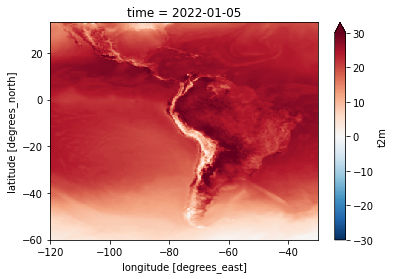

In [54]:
t2m.isel(time=0).plot(size=4, vmax=30)

xarray hace buena parte del trabajo por nosotros (añadiendo por defecto etiquetas y la barra de colores). El ajuste de la escala de color es automático, pero podemos usar los argumentos *vmin/vmax* para ajustarlos.

Observar que al ajustar el nivel de temperatura máxima vmax=30, la barra de color indica que hay puntos por encima de ella acabando en un triángulo, en lugar de con un rectángulo

xarray ofrece una gran versatilidad a la hora de pintar gráficos. Por ejemplo, con el argumento *levels* podemos elegir pintar intervalos de forma discreta:

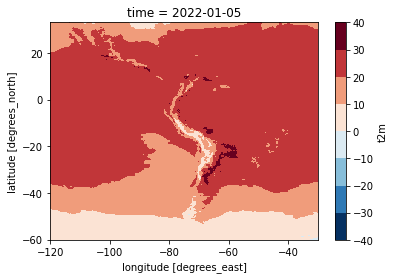

In [21]:
t2m.isel(time=0).plot(size=4, levels=8)

No solo podemos eliminar la dimensión tiempo, también las dimensiones espaciales.

Vamos a ilustrar esta funcionalidad con dos nuevos ficheros de ERA5, que contienen información sobre el huracán Karl (https://es.wikipedia.org/wiki/Hurac%C3%A1n_Karl), que afectó a México entre el 14 y el 18 de septiembre de 2010. El primer fichero contiene información de superficie, y el segundo tiene información en la vertical, en las tres coordenadas espaciales (latitud, longitud y nivel), y en el tiempo:

In [3]:
ds_karl_sfc = xr.open_dataset('/MASIVO/pn31/curso_PIBM/era5_karl2010_sfc.nc')
ds_karl_lev = xr.open_dataset('/MASIVO/pn31/curso_PIBM/era5_karl2010_levels.nc')

In [47]:
ds_karl_lev

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121, level: 16, time: 40)
Coordinates:
  * longitude  (longitude) float32 -105.0 -104.8 -104.5 ... -75.5 -75.25 -75.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... 3.75 3.5 3.25 3.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2010-09-14 ... 2010-09-18T21:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-02 17:34:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Esta es la zona representada:

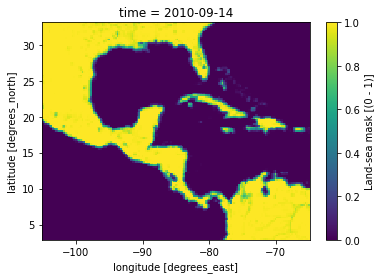

In [50]:
# Pintamos el parámetro lsm, la máscara de tierra
ds_karl_sfc.lsm.isel(time=0).plot(size=4)

Si seleccionamos la dimensión tiempo y la coordenada vertical en el fichero con niveles volvemos a obtener un mapa:

In [6]:
tem_karl = ds_karl_lev.t - 273.15

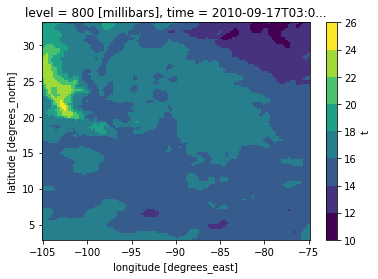

In [47]:
tem_karl.sel(time='2010-09-17T03:00:00').sel(level=800).plot(levels=9)

¿Qué ocurre si eliminamos otra coordenada, por ejemplo la latitud, en lugar del nivel? En ese caso obtenemos un corte vertical a lo largo del paralelo elegido:

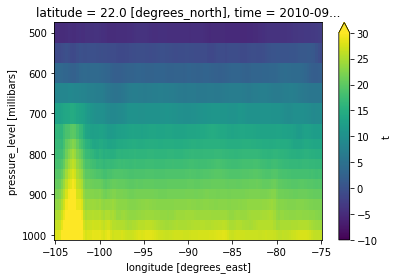

In [86]:
tem_karl.sel(time='2010-09-17T03:00:00',latitude=22.0).plot(size=4,yincrease=False,vmin=-10,vmax=30)

Si eliminamos otra dimensión más, por ejemplo el nivel:

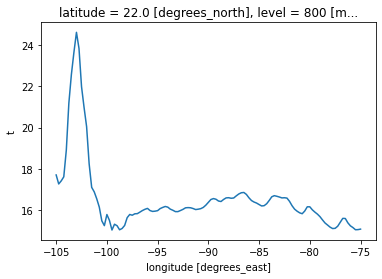

In [87]:
tem_karl.sel(time='2010-09-17T03:00:00', latitude=22.0, level=800).plot(size=4)

Podemos utilizar los objetos Figure y Axes como hacíamos en matplotlib si queremos tener un mayor control sobre el gráfico:

Text(0.5, 1.0, 'Mapa temperatura a 2m el 17 de septiembre de 2010')

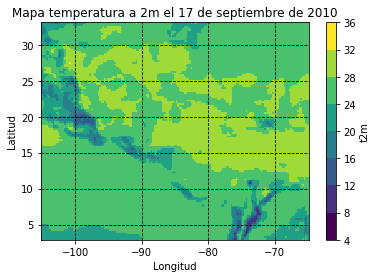

In [45]:
fig, ax = plt.subplots()

# Pasamos los ejes como argumento:
t2m_karl = ds_karl_sfc.t2m - 273.15
t2m_karl.sel(time='2010-09-17T03:00:00').plot(ax=ax, levels=9)

# Personalizamos el gráfico:
ax.grid(True, color='black', linestyle='--')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Mapa temperatura a 2m el 17 de septiembre de 2010')

También podemos variar la dimensión tiempo y dejar el resto constantes. Vamos a hacer esto con nuestro fichero original del continente, tomando las coordenadas de Santo Domingo (aproximadamente 18.5N 70W): 

Text(0.5, 1.0, 'Temperatura en Santo Domingo en 2022')

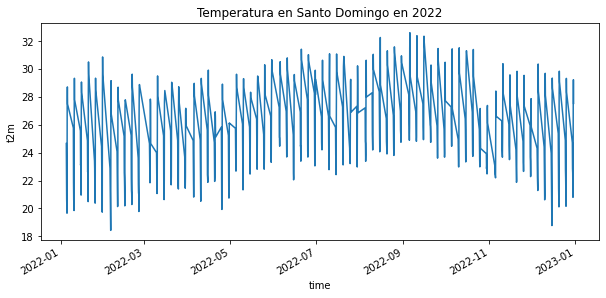

In [94]:
fig, ax = plt.subplots(figsize=(10,4))
t2m.sel(latitude=18.5, longitude=-69.9, method='nearest').plot(ax=ax)
ax.set_title("Temperatura en Santo Domingo en 2022")

### Facetas

Las facetas nos permiten dividir un array según una dimensión y pintar cada grupo resultante, reduciendo en uno la dimensión a dibujar. Por ejemplo, si tenemos como dimensiones la latitud, la longitud y el tiempo, podemos hacer "faceting" en el tiempo, pintando un mapa por cada instante de tiempo. No es recomendable utilizar esta opción si van a crearse demasiadas gráficas.

En el siguiente ejemplo tenemos como dimensiones la latitud, longitud, nivel de presión y tiempo. Hacemos "faceting" en nivel de presión y tiempo (argumentos *col* y *row*). Como tenemos 5 niveles y 3 tiempos diferentes, nos salen 5 * 3 = 15 gráficas:

In [13]:
ds_karl_sfc

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 121, time: 40)
Coordinates:
  * longitude  (longitude) float32 -105.0 -104.8 -104.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2010-09-14 ... 2010-09-18T21:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    lsm        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-02 17:49:00 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [18]:
tem_karl = ds_karl_lev.t - 273.15

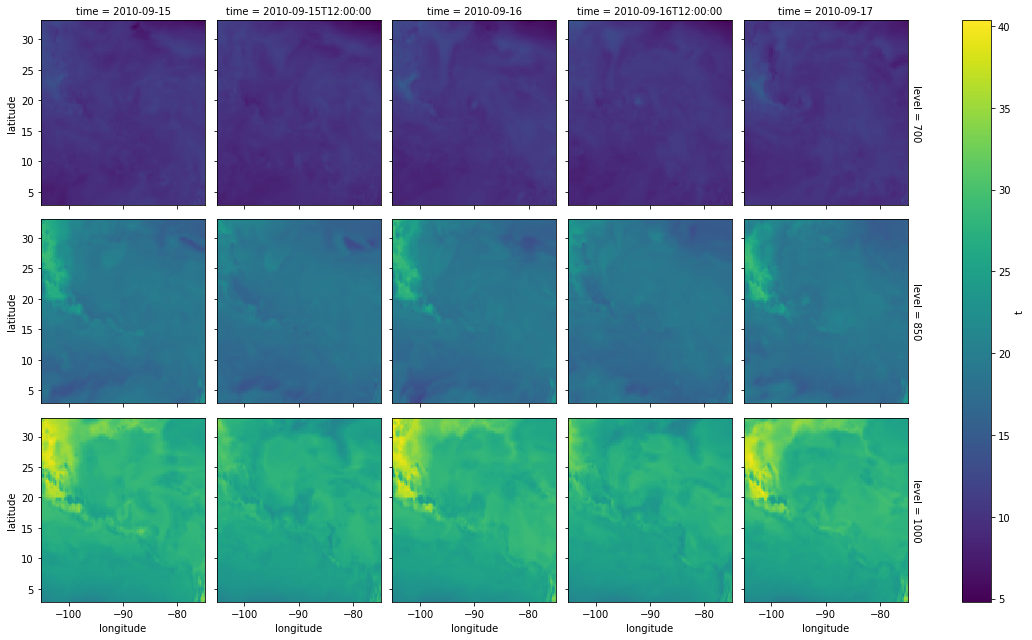

In [65]:
tem_karl.isel(time=[8,12,16,20,24]).sel(level=[700,850,1000]).plot(col='time', row='level')

## Máscaras

Las máscaras permiten elegir un subconjunto de los datos queremos usar. A diferencia de las funciones isel() y sel(), una máscara preserva las dimensiones originales de los datos. La función ``where`` nos permite hacer esta selección, aceptando una o más condiciones. Esta función puede encadenarse a otras (como suele suceder en general). Cuando se encadenen varias funciones es importante tener en cuenta el orden para optimizar recursos.

La condición de la máscara puede depender de los valores de los datos, o de los valores de las coordenadas. En el ejemplo siguiente queremos superponer varios campos, y evitar que la lluvia nos tape el campo de la máscara de tierra-mar (land sea mask), que está debajo. Para ello imponemos que solo se seleccionen los puntos con una precipitación mayor de 1mm:

In [9]:
tp = ds_karl_sfc['tp']*1000.0  # Precipitación en mm
tpval = tp.where(tp > 1)
lsm = ds_karl_sfc['lsm']
lsm = lsm.where(lsm > 0.5)  # Puntos de tierra
msl = ds_karl_sfc['msl']

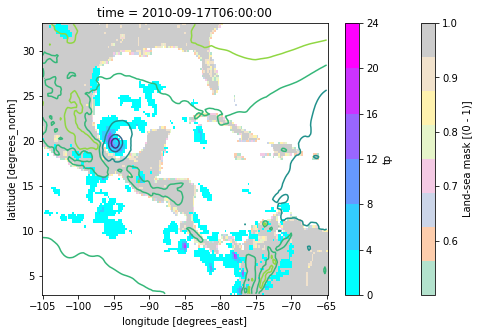

In [6]:
lsm.sel(time='2010-09-17T06:00:00').plot(cmap='Pastel2', figsize=(8,5))
tpval.sel(time='2010-09-17T06:00:00').plot(cmap='cool', levels=6)
msl.sel(time='2010-09-17T06:00:00').plot.contour()

Se puede rellenar la zona enmascarada con valores preestablecidos. Esto se indica con el segundo argumento de ``where``.

Las máscaras pueden depender también de las coordenadas. En el siguiente ejemplo se pinta la precipitación y el contorno de la presión a nivel del mar para las 6 UTC del día 17 de septiembre, pero solo para zonas al oeste del meridiano 90W, y se completa la gráfica pintando la precipitación y la presión para las 9 UTC del día 15 de septiembre para el resto de zonas (al este del meridiano 90W). El efecto que produce es el de "dos huracanes Karl": antes y después de cruzar la península del Yucatán (se muestra la gráfica solo para mostrar las capacidades de xarray, pero esto probablemente no tenga mucho sentido).

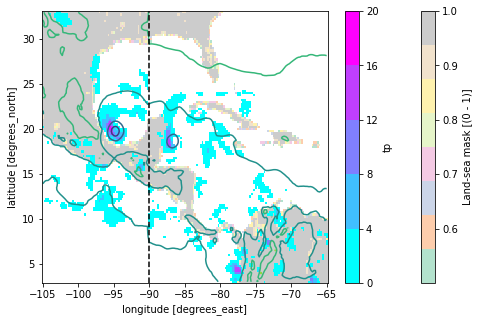

In [114]:
post_t = '2010-09-17T06:00:00'
pre_t = '2010-09-15T09:00:00'

lsm.sel(time=post_t).plot(cmap='Pastel2', figsize=(8,5))
tpval.sel(time=post_t).where(tpval.longitude<-90, tpval.sel(time=pre_t)).plot(cmap='cool', levels=6)
msl.sel(time=post_t).where(msl.longitude<-90, msl.sel(time=pre_t)).plot.contour()
plt.axvline(x=-90, color='k', linestyle='--')

Notar que el campo máscara de tierra-mar toma valores un valor 0 en el mar y 1 en tierra, lo que nos puede servir para discriminar qué coordenadas corresponden a tierra o mar. En este ejemplo pintamos la temperatura a 2m, pero solo para los puntos de tierra:

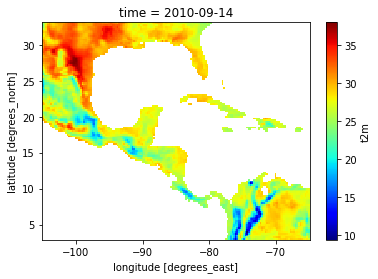

In [9]:
t2m_karl_sfc = ds_karl_sfc['t2m'] - 273.15
t2m_karl_sfc.isel(time=0).where(lsm.isel(time=0)>0.5).plot(cmap='jet')

## Estadísticas

Xarray puede calcular todo tipo de estadísticos, como Pandas. Por ejemplo, si queremos calcular la media:

In [96]:
t2m.mean()

<xarray.DataArray 't2m' ()>
array(19.10648, dtype=float32)

Notar que es un datarray de un solo elemento, porque hemos hecho la media de todas las dimensiones (tiempo, latitud y longitud). Podemos extraer el valor con ``item``:

In [97]:
t2m.mean().item()

19.10647964477539

Si se quiere calcular el estadístico solo sobre algunas dimensiones las podemos especificar con el argumento *dim*.

Por ejemplo, si se quiere calcular el percentil 10 para la dimensión tiempo (o sea, el valor que solo tiene por debajo un 10% de los datos para cada latitud y longitud), y pintar el mapa resultante:

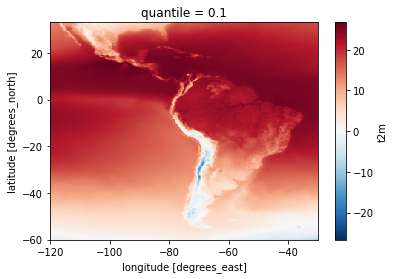

In [104]:
t2m.quantile(0.1, dim='time').plot(size=4)

Recordar que podemos ver las coordenadas del datarray con *coords*:

In [99]:
t2m.coords

Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
  * time       (time) datetime64[ns] 2022-01-05 ... 2022-12-30T21:00:00

**Ejercicio:** 
- Calcular y pintar un mapa con el máximo intervalo de temperaturas para cada latitud y longitud con los datos de ERA5 de 2022.
- Calcular el mínimo de la temperatura en tierra durante el episodio del huracán Karl.

## Computación

Xarray nos da varios métodos para hacer cálculos más avanzados. A modo de ejemplo, vamos a explicar uno de ellos, las agrupaciones (hay varios más).

### Agrupaciones

De la misma forma que en pandas, podemos separar y combinar datos de acuerdo a un cierto criterio. Para ello se pueden usar los métodos ``groupby`` y ``groupby_bins``. Vamos a mostrarlo con dos ejemplos.

En el primer ejemplo, vamos a agrupar los datos de temperatura para Santo Domingo por cada mes y calculamos la media:

(18.0, 33.0)

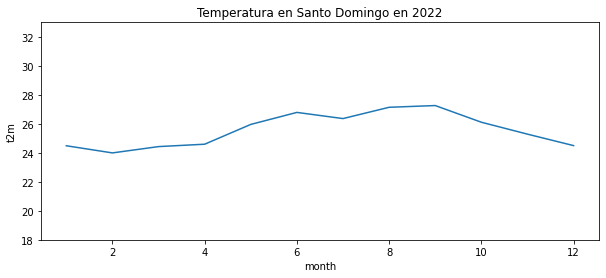

In [41]:
t2m_stdom = t2m.sel(latitude=18.5, longitude=-69.9, method='nearest')

fig, ax = plt.subplots(figsize=(10,4))
t2m_stdom.groupby('time.month').mean().plot(ax=ax)
ax.set_title("Temperatura en Santo Domingo en 2022")
ax.set_ylim([18, 33])

Vemos que de esta forma eliminamos el ruido y vemos la variación de la temperatura durante todo el año más claramente.

En el segundo ejemplo, agrupamos los datos de temperatura del continente por estación del año (season), creando un objeto DataArrayGroupBy:

In [6]:
t2m.groupby("time.season")

DataArrayGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

Y después calculamos la mínima temperatura para cada estación:

In [45]:
seasonal_min = t2m.groupby("time.season").min()
seasonal_min

<xarray.DataArray 't2m' (season: 4, latitude: 373, longitude: 361)>
array([[[ 11.440033  ,  11.445862  ,  11.594177  , ...,  15.509399  ,
          15.320221  ,  15.277039  ],
        [ 11.320923  ,  11.535797  ,  11.724945  , ...,  15.605133  ,
          15.483704  ,  15.481384  ],
        [ 11.394501  ,  11.570801  ,  11.736633  , ...,  15.884216  ,
          15.737091  ,  15.731262  ],
        ...,
        [  0.6810303 ,   0.696228  ,   0.7067261 , ...,  -2.64917   ,
          -2.6340027 ,  -2.6503296 ],
        [  0.5280762 ,   0.5397644 ,   0.553772  , ...,  -2.70755   ,
          -2.6923828 ,  -2.6678467 ],
        [  0.27819824,   0.30038452,   0.31906128, ...,  -2.7904663 ,
          -2.7822876 ,  -2.7414246 ]],

       [[ 13.284973  ,  13.590912  ,  13.822113  , ...,  19.894012  ,
          19.875336  ,  19.875336  ],
        [ 13.140167  ,  13.282623  ,  13.491638  , ...,  19.97342   ,
          19.992126  ,  19.989777  ],
        [ 13.224243  ,  13.197388  ,  13.284973  , ...,  20.121735  ,
          20.115875  ,  20.101868  ],
...
        [ -0.37686157,  -0.34768677,  -0.31030273, ...,  -5.8077393 ,
          -5.7353516 ,  -5.62677   ],
        [ -0.43292236,  -0.41540527,  -0.40371704, ...,  -6.2059326 ,
          -6.141693  ,  -6.0751343 ],
        [ -0.48312378,  -0.39089966,  -0.30215454, ...,  -6.551544  ,
          -6.5223694 ,  -6.4838257 ]],

       [[ 12.652069  ,  12.903137  ,  13.102814  , ...,  20.14273   ,
          20.159088  ,  20.08435   ],
        [ 12.64975   ,  12.774689  ,  12.94635   , ...,  20.259521  ,
          20.259521  ,  20.174255  ],
        [ 13.047913  ,  13.071289  ,  13.131989  , ...,  20.32257   ,
          20.20697   ,  20.134583  ],
        ...,
        [ -5.513489  ,  -5.4259033 ,  -5.341858  , ...,  -9.577026  ,
          -9.61203   ,  -9.670441  ],
        [ -5.6641235 ,  -5.5730286 ,  -5.5263367 , ..., -10.111816  ,
         -10.143341  , -10.169037  ],
        [ -5.7832336 ,  -5.7411804 ,  -5.716675  , ..., -10.604584  ,
         -10.633759  , -10.645447  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -30.5 -30.25 -30.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... -59.5 -59.75 -60.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

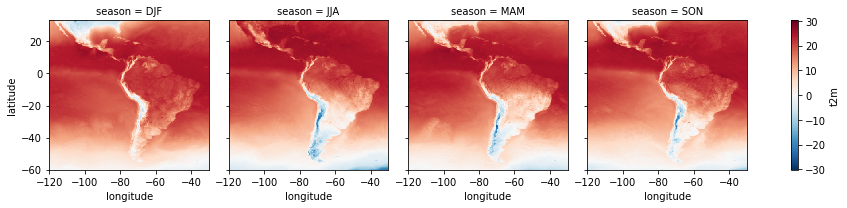

In [46]:
seasonal_min.plot(col="season")

## Escritura de ficheros netCDF

Para escribir un dataset como un fichero netCDF en disco utilizaremos el método ``to_netcdf``. Este método funciona también con un datarray, guardándolo como un netCDF.

Veamos un ejemplo: vamos a guardar únicamente la precipitación como variable en un nuevo fichero netCDF:

In [9]:
ds_karl_sfc = xr.open_dataset('/MASIVO/pn31/curso_PIBM/era5_karl2010_sfc.nc')
ds_karl_sfc.data_vars

Data variables:
    t2m      (time, latitude, longitude) float32 ...
    lsm      (time, latitude, longitude) float32 ...
    msl      (time, latitude, longitude) float32 ...
    tp       (time, latitude, longitude) float32 ...

In [11]:
new_ds = ds_karl_sfc.drop(['t2m','lsm', 'msl']) # Borramos estos tres datarrays, dejando solo tp como variable en el dataset

In [13]:
new_ds.to_netcdf('era5_karl_precipitacion.nc')

In [15]:
ds_precip = xr.open_dataset('era5_karl_precipitacion.nc')
ds_precip.data_vars

Data variables:
    tp       (time, latitude, longitude) float32 ...

Efectivamente, solo la precipitación está en el nuevo fichero.

## Unos comentarios sobre Cartopy

Xarray está muy integrada con Cartopy (https://scitools.org.uk/cartopy/docs/latest/), una librería creada por el MetOffice para la generación de mapas y procesamiento de datos geoespaciales.

Con Cartopy podemos incluir varios elementos esenciales en un mapa, como proyecciones, líneas de costa, accidentes geográficos, fronteras, etc.

En este curso no vamos a tener tiempo de explicar Cartopy, pero se incluyen a continuación varios ejemplos que pueden dar idea de su utilidad. Se invita al alumno a continuar profundizando en esta librería:

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Mapa de Centroamérica y Sudamérica en proyección Ortográfica:

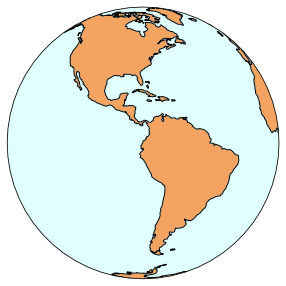

In [7]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(projection=ccrs.Orthographic(central_longitude=-80, central_latitude=0))
ax.add_feature(cfeature.LAND, color='sandybrown')
ax.add_feature(cfeature.OCEAN, color='lightcyan')
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)
plt.show()

Huracán Karl el día 17 de septiembre de 2010, incluyendo líneas de costa:

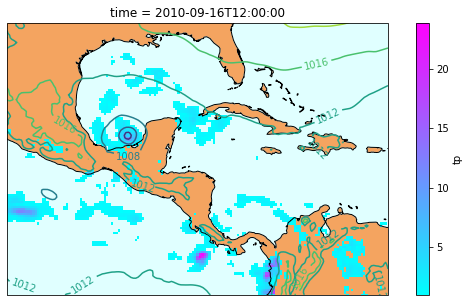

In [10]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent((-105,-65,3,30))
ax.add_feature(cfeature.LAND, color='sandybrown')
ax.add_feature(cfeature.OCEAN, color='lightcyan')
ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=1)
tpval.isel(time=20).plot(cmap='cool')
msl = msl/100   # Pasamos de pascales a hectopascales
cont_msl = msl.isel(time=20).plot.contour()
ax.clabel(cont_msl)
plt.show()

Evolución del huracán Karl entre el 14 y el 18 de septiembre de 2010:

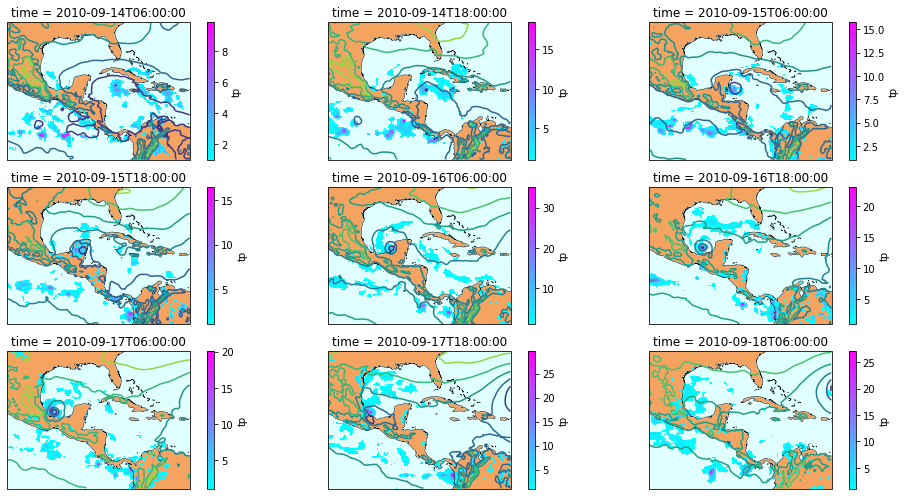

In [10]:
fig = plt.figure(figsize=[14, 7])

lst_axes = []

numx = 3
numy = 3

for i in range(0,numx*numy):

    id_time = 2+4*i
    
    lst_axes.append(fig.add_subplot(numx,numy,i+1,projection=ccrs.PlateCarree()))
    ax = lst_axes[i]

    tpval.isel(time=id_time).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cool')
    msl.isel(time=id_time).plot.contour(ax=ax)

    ax.add_feature(cfeature.LAND, color='sandybrown')
    ax.add_feature(cfeature.OCEAN, color='lightcyan')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)

plt.tight_layout()
plt.show()

Mapa de temperatura a 2m en Centroamérica y Sudamérica usando cuatro proyecciones diferentes:

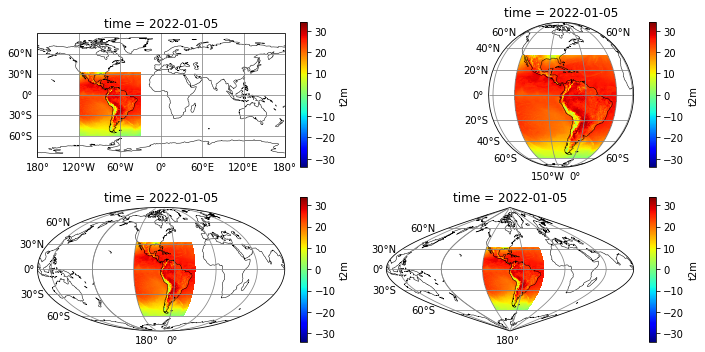

In [13]:
fig = plt.figure(figsize=[10, 5])

ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2,2,2,projection=ccrs.Orthographic(central_latitude=0, central_longitude=-80))
ax3 = fig.add_subplot(2,2,3,projection=ccrs.Mollweide(central_longitude=-80))
ax4 = fig.add_subplot(2,2,4,projection=ccrs.Sinusoidal(central_longitude=-80))

temp = t2m.isel(time=0)

for ax in (ax1,ax2,ax3,ax4) :

   temp.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='jet')
   ax.set_global()
   gl = ax.gridlines(color='#888888', draw_labels=True, x_inline=False, y_inline=False)
   gl.top_labels=False
   gl.right_labels=False
   ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw=0.5)
    
plt.tight_layout()

plt.show()